# Deutsch Algorithm

## Problem:
Given some Function $ f: \{0,1\} \rightarrow \{0,1\} $ can we predict if the function is stationary (same output for any input x) or if it is balanced (function outputs both 0 and 1 for different values of x).

With classical computing we need to "run" the function twice. We put in 0 and see what comes out and than do the same for x=1 if both outputs are equal the function is stationary and if the outputs differ the function is balanced. Now how many runs does a quantum computer need?

In [1]:
import qiskit
from qiskit.visualization import plot_histogram
from math import sqrt

In [2]:
backend = qiskit.Aer.get_backend("aer_simulator")


There are 4 possible functions.

two balanced functions

$f_{1}(0) \rightarrow  0 $    

$f_{1}(1) \rightarrow  1 $

$f_{2}(0) \rightarrow  1 $

$f_{2}(1) \rightarrow  0 $

and two constant functions

$f_{3}(0) \rightarrow  1$

$f_{3}(1) \rightarrow  1$

no logic gate:

$f_{4}(0) \rightarrow  0$

$f_{4}(1) \rightarrow  0$

each of these functions can be represented by a combination of not and cnot gates

In [44]:
# oracle
def oracle(circuit, function=1):
    if function == 1:
        circuit.cx(1, 0)
    if function == 2:
        circuit.x(0)
        circuit.cx(1, 0)
    if function == 3:
        circuit.x(0)
    
    return circuit

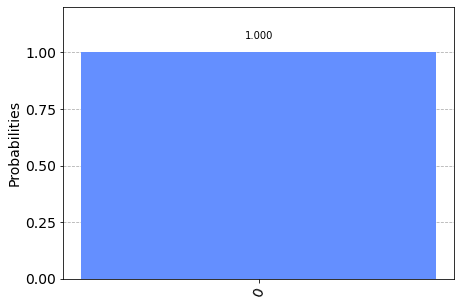

In [55]:
qc = qiskit.QuantumCircuit(2, 1)
qc.x(1)

qc = oracle(qc, function=2)

qc.measure(0, 0)

result = qiskit.execute(qc, backend=backend).result()
plot_histogram(result.get_counts())

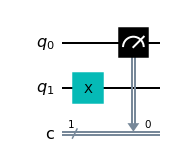

In [54]:
qc.draw(output="mpl")

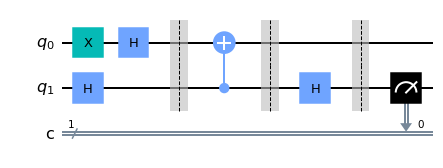

In [67]:
qc = qiskit.QuantumCircuit(2, 1)

qc.x(0)
qc.h(0)
qc.h(1)
qc.barrier()
qc = oracle(qc, function=1)
qc.barrier()
qc.h(1)

qc.barrier()


qc.measure(1, 0)

qc.draw(output="mpl")

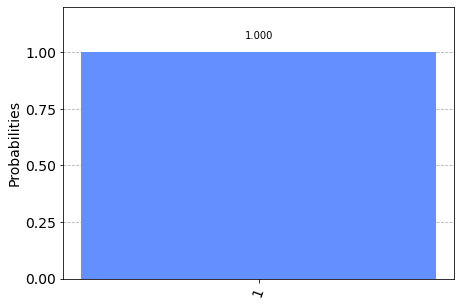

In [68]:
result = qiskit.execute(qc, backend=backend).result()
plot_histogram(result.get_counts())

### Explanation
The wave function of this 2qbit system looks as follows:

$|\psi> = \frac{1}{2}(|1> + |0>)\otimes(|1> -|0>)$

We can now simply look how each of these for functions swaps the probabilty amplitudes. $f_{1}$ and $f_{3}$ change the state of the control qbit from $|\psi> = \frac{1}{\sqrt{2}}(|1> + |0>)$ to $|\psi> = \frac{1}{\sqrt{2}}(|1> - |0>)$, so after applying the Hadamard gate we measure one.

$f_{3}$ and $f_{4}$ on the other hand have no effect on the state of qbit one, and we measure 0.

So whenever a function is constant we measure 0 and we measure 1 for every balanced function